In [2]:
using Distributions, Optim, Plots

In [54]:
function p_u(U, σ, μ=5.0)
    return cdf(Normal(μ, σ), U)
end
p_u(9.4,2.0)

0.9860965524865014

In [50]:
function expected_value(U, n, LK, σ)
    pu = p_u(U, σ)
    return (U * (1 - pu^(n - LK))+5 * pu^(n - LK))
end

expected_value (generic function with 1 method)

In [51]:
function maximize_EV(n, LK, σ)
    objective(U) = -expected_value(U, n, LK, σ)
    res = optimize(objective, 0.0, 10.0, Brent())
    return Optim.minimizer(res), -Optim.minimum(res)
end

maximize_EV (generic function with 1 method)

In [52]:
n = 100   
σ = 2.0   

results = [(LK, maximize_EV(n, LK, σ)) for LK in 1:n]
results1 = Float64[]

for i in 1:n
    push!(results1,results[i][2][1])
end

for (LK, (U_opt, EV_max)) in results
    println("LK = $LK: U(K) = $U_opt, EV_g = $EV_max")
end
results1

LK = 1: U(K) = 8.906970792758537, EV_g = 8.600428562538138
LK = 2: U(K) = 8.899845878495524, EV_g = 8.592504268072265
LK = 3: U(K) = 8.89264475306981, EV_g = 8.584491760666875
LK = 4: U(K) = 8.885365832340224, EV_g = 8.576389145380574
LK = 5: U(K) = 8.87800748304031, EV_g = 8.56819446667513
LK = 6: U(K) = 8.870568020738995, EV_g = 8.559905705830321
LK = 7: U(K) = 8.863045753501916, EV_g = 8.551520778220384
LK = 8: U(K) = 8.855438751715557, EV_g = 8.543037530443074
LK = 9: U(K) = 8.84774534116713, EV_g = 8.534453737291702
LK = 10: U(K) = 8.839963436885219, EV_g = 8.52576709855987
LK = 11: U(K) = 8.832091189807928, EV_g = 8.516975235667555
LK = 12: U(K) = 8.824126529205767, EV_g = 8.508075688096707
LK = 13: U(K) = 8.816067330549052, EV_g = 8.49906590962317
LK = 14: U(K) = 8.807911427905548, EV_g = 8.489943264331025
LK = 15: U(K) = 8.799656545900882, EV_g = 8.480705022394025
LK = 16: U(K) = 8.791300356419411, EV_g = 8.471348355607825
LK = 17: U(K) = 8.782840441342696, EV_g = 8.46187033265

100-element Vector{Float64}:
 8.906970792758537
 8.899845878495524
 8.89264475306981
 8.885365832340224
 8.87800748304031
 8.870568020738995
 8.863045753501916
 8.855438751715557
 8.84774534116713
 8.839963436885219
 8.832091189807928
 8.824126529205767
 8.816067330549052
 ⋮
 7.384577293174756
 7.326644431495109
 7.264393624284327
 7.197206253683162
 7.124337815514635
 7.044888107206276
 6.957769171135773
 6.861674924358194
 6.755071206991019
 6.636253900301663
 6.503583035937334
 3.819660112501051

In [53]:
function EV_total(means::Vector{Float64}, σ::Float64, μ::Float64=5.0, t::Int=10000)
    n = length(means)
    total_sum = 0.0
    total_sum_n = 0.0

    for _ in 1:t
        x = rand(Normal(μ, σ))
        for i in 1:n
            if x > means[i] || i == n
                total_sum += x
                total_sum_n+=i
                break
            end
            x = rand(Normal(μ, σ))
        end
    end

    return total_sum / t, total_sum_n/t
end
EV_total(results1,σ)

(9.395796634789306, 29.7115)

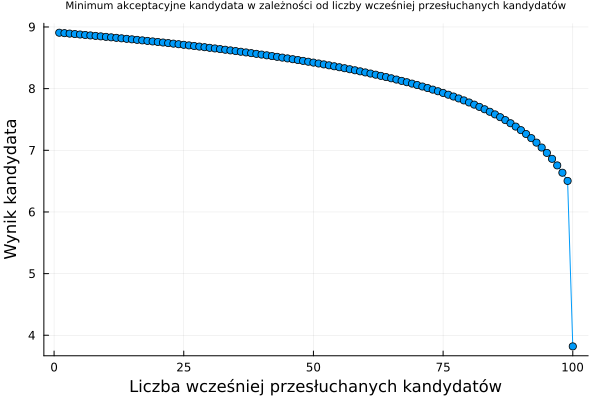

In [13]:
plot(1:n, results1, marker=:circle, xlabel="Liczba wcześniej przesłuchanych kandydatów", ylabel="Wynik kandydata", title="Minimum akceptacyjne kandydata w zależności od liczby wcześniej przesłuchanych kandydatów", legend=false,titlefontsize=7)